## Part 1: Neurons and simple neural networks
* https://nest-simulator.readthedocs.io/en/latest/tutorials/pynest_tutorial/part_1_neurons_and_simple_neural_networks.html#pynest-tutorial-1

In [1]:
import scipy

import nest
import matplotlib.pyplot as plt


[admin:1422813] shmem: mmap: an error occurred while determining whether or not /tmp/ompi.admin.1000/jf.0/4235001856/shared_mem_cuda_pool.admin could be created.
[admin:1422813] create_and_attach: unable to create shared memory BTL coordinating structure :: size 134217728 



              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: 3.8.0-post0.dev0
 Built: Oct  2 2024 11:54:50

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.



In [2]:

neuron = nest.Create("iaf_psc_alpha")
neuron2 = nest.Create("iaf_psc_alpha")


In [3]:
neuron.set(I_e=376.0) # set the constant background current
neuron2.set(I_e=400.0) # set the constant background current

In [4]:
multimeter = nest.Create("multimeter") # create a multimeter device
multimeter.set(record_from=["V_m"]) # record membrane potential

In [5]:
spikerecorder = nest.Create("spike_recorder") # create a spike recorder

In [6]:
nest.Connect(multimeter, neuron)
nest.Connect(multimeter, neuron2)
nest.Connect(neuron, spikerecorder)
nest.Connect(neuron2, spikerecorder)

* The order in which the arguments to Connect() are specified reflects the flow of events: if the neuron spikes, it sends an event to the spike recorder. Conversely, the multimeter periodically sends requests to the neuron to ask for its membrane potential at that point in time. This can be regarded as a perfect electrode stuck into the neuron.

In [7]:
nest.Simulate(1000.0)


Oct 02 12:46:38 NodeManager::prepare_nodes [Info]: 
    Preparing 4 nodes for simulation.

Oct 02 12:46:38 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 4
    Simulation time (ms): 1000
    Number of OpenMP threads: 1
    Number of MPI processes: 1

Oct 02 12:46:38 SimulationManager::run [Info]: 
    Simulation finished.


In [8]:
dmm = multimeter.get()
Vms = dmm["events"]["V_m"]
ts = dmm["events"]["times"]

In [9]:
dmm.keys() # multimeter dictionary keys

dict_keys(['element_type', 'events', 'frozen', 'global_id', 'interval', 'label', 'local', 'model', 'model_id', 'n_events', 'node_uses_wfr', 'offset', 'origin', 'record_from', 'record_to', 'start', 'stop', 'thread', 'thread_local_id', 'time_in_steps', 'vp'])

In [10]:
dmm["events"].keys() # events dictionary keys

dict_keys(['senders', 'times', 'V_m'])

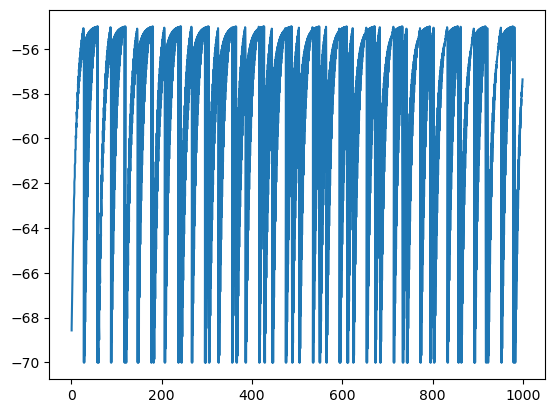

In [11]:
import matplotlib.pyplot as plt
plt.figure(1)
plt.plot(ts, Vms) # since we input 376.0, the membrane potential keep spiking


* It looks not right

In [12]:
vms_1 = dmm['events']['V_m'][::2]
vms_2 = dmm['events']['V_m'][1::2]
ts_1 = dmm['events']['times'][::2]
ts_2 = dmm['events']['times'][1::2]


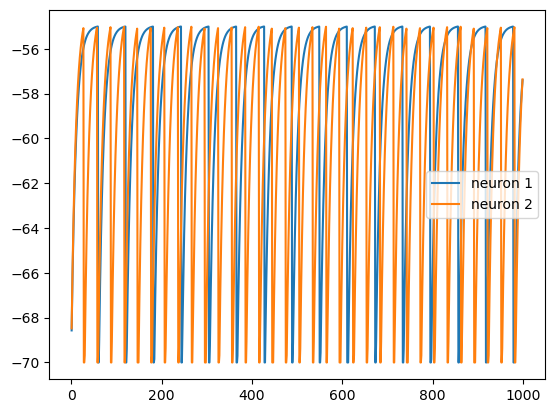

In [13]:
plt.figure(2)
plt.plot(ts_1, vms_1)
plt.plot(ts_2, vms_2)
plt.legend(['neuron 1', 'neuron 2'])

In [14]:
spikerecorder.get("events").keys() # spike recorder dictionary keys

dict_keys(['senders', 'times'])

In [15]:
events = spikerecorder.get("events")

In [16]:
senders = events["senders"]
senders # array of neuron ids that spiked

array([2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2,
       2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2,
       1, 2, 2, 1, 2])

In [17]:
ts_spikere = events["times"]
ts_spikere # array of spike times

array([ 27.8,  57.6,  59.3,  87.4, 117.2, 120.6, 147. , 176.8, 181.9,
       206.6, 236.4, 243.2, 266.2, 296. , 304.5, 325.8, 355.6, 365.8,
       385.4, 415.2, 427.1, 445. , 474.8, 488.4, 504.6, 534.4, 549.7,
       564.2, 594. , 611. , 623.8, 653.6, 672.3, 683.4, 713.2, 733.6,
       743. , 772.8, 794.9, 802.6, 832.4, 856.2, 862.2, 892. , 917.5,
       921.8, 951.6, 978.8, 981.4])

Text(0.5, 0, 'time (ms)')

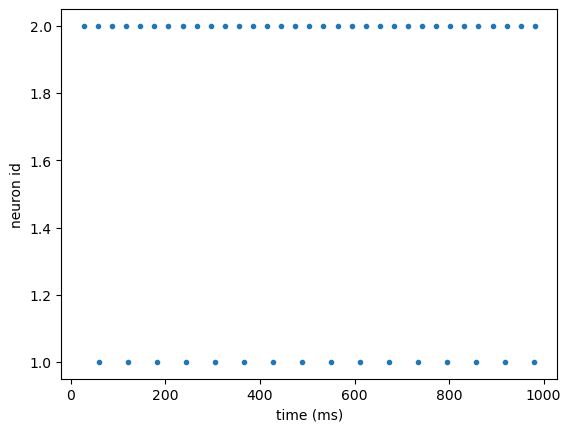

In [18]:
plt.figure(3)
plt.plot(ts_spikere, senders, ".") 
plt.ylabel("neuron id")
plt.xlabel("time (ms)")